In [53]:
import pandas as pd  
from sdv.tabular import CTGAN
import stat_tests

In [54]:
real_data = pd.read_csv('datasets/kag_risk_factors_cervical_cancer.csv')

In [55]:
ctgan = CTGAN()
ctgan.fit(real_data)

c:\Users\Artem\Desktop\General\Biomed\tests\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
c:\Users\Artem\Desktop\General\Biomed\tests\lib\site-packages\sklearn\mixture\_base.py:146: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)


In [56]:
synthetic_data = ctgan.sample()

In [57]:
synthetic_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,25,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,7.0,0,0,0,0,0,0,0,0
1,23,2.0,21.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,25,3.0,18.0,1.0,0.0,0.0,0.15,?,4.0,0.0,...,?,8.0,0,0,0,0,0,0,0,0
3,39,?,17.0,1.0,0.0,0.0,?,0.0,2.0,?,...,?,?,0,0,0,0,0,0,0,0
4,29,2.0,22.0,?,1.0,0.0,0.0,?,?,0.0,...,?,?,0,0,0,0,0,0,0,0


In [58]:
# needs cleaning of real_data to get rid of dummy data

In [59]:
import matplotlib.pyplot as plt
from sdv.evaluation import evaluate

In [60]:
real_age = real_data['Age']
syn_age = synthetic_data['Age']

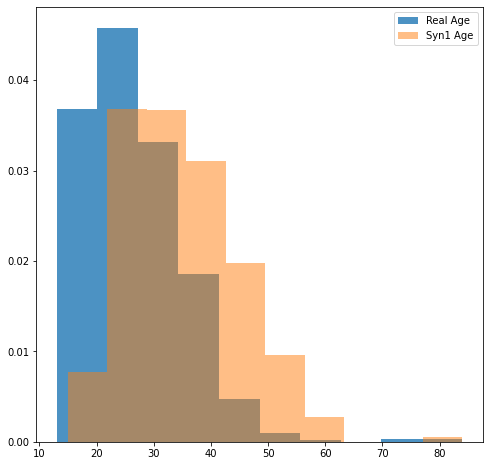

In [61]:
plt.figure(figsize=(8, 8))
plt.hist(real_age, alpha=0.8, density=True)
plt.hist(syn_age, alpha=0.5, density=True)
plt.legend(labels=('Real Age', 'Syn1 Age'))
plt.show()

In [62]:
print(stat_tests.ks_test(real_age, syn_age))
print(evaluate(pd.DataFrame(syn_age), pd.DataFrame(real_age), aggregate=False, metrics=['KSTest']))

[0.4, 0.06566141874359639]
   metric                                     name  raw_score  \
0  KSTest  Inverted Kolmogorov-Smirnov D statistic   0.656177   

   normalized_score  min_value  max_value      goal error  
0          0.656177        0.0        1.0  MAXIMIZE  None  


In [63]:
from scipy import stats

In [66]:
kstest, crit = stats.kstest(real_age, syn_age)
print(kstest, crit)
print(1-kstest)
print('Reject') if kstest > crit else print('Accept')

0.34382284382284384 2.328656652798643e-45
0.6561771561771561
Reject
